# Script to calculate the IC50 for metronidazole tested on WB, C6NR, C6aI and C60.5 on 12_9_19, first plate

In [1]:
#Import all needed modules
import pandas as pd
import numpy as np


In [2]:
#Read in data from excel file
WD = pd.read_excel("EC50MTZ_12_9_19_1.xlsx")
Data = WD[28:37]
Data

,Application: Tecan i-control,Unnamed: 1,Unnamed: 2,Unnamed: 3,"Tecan i-control , 1.10.4.0",Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
28,<>,1,2.0,3.0,4,5,6.0,7.0,8,9.0,10.0,11.0,12.0
29,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,B,NaN,24323.0,1034.0,21896,18077,15495.0,36462.0,22864,15788.0,2207.0,2607.0,NaN
31,C,NaN,26089.0,29118.0,1171,17488,26767.0,20000.0,23824,18205.0,20951.0,7431.0,NaN
32,D,NaN,27013.0,31148.0,21497,1173,5527.0,48527.0,22263,14672.0,31742.0,38765.0,NaN
33,E,NaN,26837.0,38747.0,24171,18179,1194.0,38811.0,28983,16780.0,33915.0,23008.0,NaN
34,F,NaN,28554.0,36075.0,26308,17159,21708.0,8147.0,29529,11159.0,1469.0,1632.0,NaN
35,G,NaN,27080.0,35688.0,23795,20779,28911.0,37884.0,30589,20432.0,8693.0,3219.0,NaN
36,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Before I can define the names I need to distract the background signal from the solutions used

Background = (Data.iloc[2,3]+Data.iloc[3,4]+Data.iloc[4,5]+Data.iloc[5,6])/4

In [4]:
#That Background signal is distracted from all cells.
Data_nB = Data.iloc[1:9,1:13]
Data_nB -= Background
Data_nB

,Unnamed: 1,Unnamed: 2,Unnamed: 3,"Tecan i-control , 1.10.4.0",Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,23180.0,-109.0,20753,16934,14352.0,35319.0,21721,14645.0,1064.0,1464.0,NaN
31,NaN,24946.0,27975.0,28,16345,25624.0,18857.0,22681,17062.0,19808.0,6288.0,NaN
32,NaN,25870.0,30005.0,20354,30,4384.0,47384.0,21120,13529.0,30599.0,37622.0,NaN
33,NaN,25694.0,37604.0,23028,17036,51.0,37668.0,27840,15637.0,32772.0,21865.0,NaN
34,NaN,27411.0,34932.0,25165,16016,20565.0,7004.0,28386,10016.0,326.0,489.0,NaN
35,NaN,25937.0,34545.0,22652,19636,27768.0,36741.0,29446,19289.0,7550.0,2076.0,NaN
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#This code does the first step; assigning the letter and number combinations to their identifiers on the plate

#Having some problem to move it to a module because it than only is assigned locally.
#I will leave this for now and accept it as is. This is definetely clearer for the user and this step
#will always be the same.

A1,B1,C1,D1,E1,F1,G1,H1 = Data_nB.iloc[0:8,0]   #This corresponds to the first Data_nB column
A2,B2,C2,D2,E2,F2,G2,H2 = Data_nB.iloc[0:8,1]   #This corresponds to the second Data_nB column
A3,B3,C3,D3,E3,F3,G3,H3 = Data_nB.iloc[0:8,2]   #etc
A4,B4,C4,D4,E4,F4,G4,H4 = Data_nB.iloc[0:8,3]  
A5,B5,C5,D5,E5,F5,G5,H5 = Data_nB.iloc[0:8,4]
A6,B6,C6,D6,E6,F6,G6,H6 = Data_nB.iloc[0:8,5]
A7,B7,C7,D7,E7,F7,G7,H7 = Data_nB.iloc[0:8,6]
A8,B8,C8,D8,E8,F8,G8,H8 = Data_nB.iloc[0:8,7]
A9,B9,C9,D9,E9,F9,G9,H9 = Data_nB.iloc[0:8,8]
A10,B10,C10,D10,E10,F10,G10,H10 = Data_nB.iloc[0:8,9]
A11,B11,C11,D11,E11,F11,G11,H11 = Data_nB.iloc[0:8,10]
A12,B12,C12,D12,E12,F12,G12,H12 = Data_nB.iloc[0:8,11]

In [6]:
#Survival rates for strain one at all concentrations. Always take the field with drug (+-field in template)
#and divide by the mock field. Than make a list of them, the first element serves as 1 (=100%).
#The Strain0 value serve as a starting point to see whether any values are higher -> pippeting error
#Come back to these values to doublecheck for calculations of >100% in the table below.
#The number given in the name is the concentration in µM.
WB0 = (B2+F6)/2
WB1 = D2/C2
WB2 = F2/E2
WB5 = B6/G2
WB10 = D6/C6
WB20 = B10/G6
WB50 = F10/D10
WB = [1, WB1, WB2, WB5, WB10, WB20, WB50]
WB0

21872.5

In [7]:
#Strain 2
C6NR0 = (C3+D7)/2
C6NR1 = E3/D3
C6NR2 = G3/F3
C6NR5 = C7/B7
C6NR10 = F7/E7
C6NR20 = B11/G7
C6NR50 = F11/D11
C6NR = [1, C6NR1, C6NR2, C6NR5, C6NR10, C6NR20, C6NR50]
C6NR0

37679.5

In [8]:
#Strain 3
C6050 = (B4+D8)/2
C6051 = E4/D4
C6052 = G4/F4
C6055 = C8/B8
C60510 = F8/E8
C60520 = C10/G8
C60550 = G10/E10
C605 = [1, C6051, C6052, C6055, C60510, C60520, C60550]
C6050

20936.5

In [9]:
#Strain 4
C6aI0 = (B5+D9)/2
C6aI1 = E5/C5
C6aI2 = G5/F5
C6aI5 = C9/B9
C6aI10 = F9/E9
C6aI20 = C11/G9
C6aI50 = G11/E11
C6aI = [1, C6aI1, C6aI2, C6aI5, C6aI10, C6aI20, C6aI50]
C6aI0

15231.5

In [10]:
# Make a list of concentrations to be included for plotting. All divided by 100 to not run into problems in next step.
Conc = [1e-22, 0.01, 0.02, 0.05, 0.10, 0.20, 0.50]

In [11]:
# Now lets make this into an array. Than transpose it and multiply by 100 to achieve procent.
MTZ_1 = pd.DataFrame([Conc, WB, C6NR, C605, C6aI] )
MTZ_1 = MTZ_1.T*100

#Set column names
MTZ_1.columns = ['Conc', 'WB', 'C6NR', 'C605', 'C6aI']
print(MTZ_1)

#Warning that below wells are adjusted in which the cells grew slower om just DMSO than with drug. 
#Those are assumed to be 100% since the drug had no clear influence here. 
#Make sure to double check the values comparing the first and second table
import warnings
warnings.warn("Warning: Values above 100% are set to 100%!")


# Adjusting for wells in which the mock grew slower than the cells with drug. 
a = MTZ_1[:]>100
MTZ_1[a] = 100
MTZ_1

           Conc          WB        C6NR        C605        C6aI
0  1.000000e-20  100.000000  100.000000  100.000000  100.000000
1  1.000000e+00  103.704001  125.325779  113.137467  104.227593
2  2.000000e+00  106.682494   98.892133   90.013908  122.602398
3  5.000000e+00   55.334079   53.390526  104.419686  116.503926
4  1.000000e+01   17.108960   18.594032  101.961207   64.053207
5  2.000000e+01    3.831749    3.984649   67.268899   32.598891
6  5.000000e+01    1.065394    1.299771   23.037959    9.494626


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Warning: Values above 100% are set to 100%!
  del sys.path[0]


,Conc,WB,C6NR,C605,C6aI
0,1.000000e-20,100.000000,100.000000,100.000000,100.000000
1,1.000000e+00,100.000000,100.000000,100.000000,100.000000
2,2.000000e+00,100.000000,98.892133,90.013908,100.000000
3,5.000000e+00,55.334079,53.390526,100.000000,100.000000
4,1.000000e+01,17.108960,18.594032,100.000000,64.053207
5,2.000000e+01,3.831749,3.984649,67.268899,32.598891
6,5.000000e+01,1.065394,1.299771,23.037959,9.494626


<function matplotlib.pyplot.show(*args, **kw)>

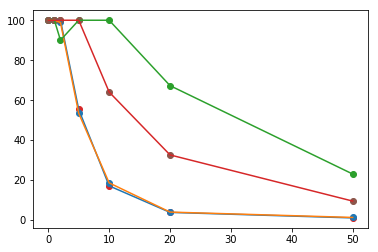

In [12]:
#A simple fast plot to check if the curve is looking funny
import matplotlib.pyplot as plt

x = np.array(MTZ_1["Conc"])
y = np.array(MTZ_1["WB"])
a = np.array(MTZ_1["C6NR"])
b = np.array(MTZ_1["C605"])
c = np.array(MTZ_1["C6aI"])


plt.plot(x, y, 'o', color='tab:red')
plt.plot(x, a, 'o', color='tab:blue')
plt.plot(x, b, 'o', color='tab:green')
plt.plot(x, c, 'o', color='tab:brown')
plt.plot(x,y)
plt.plot(x,a)
plt.plot(x,b)
plt.plot(x,c)
plt.show

In [13]:
#I gave up curve fitting for now since I could not find a satisfactory solution how to implement that. 
#hope to pick it up again once I trasnlated the whole script.

<function matplotlib.pyplot.show(*args, **kw)>

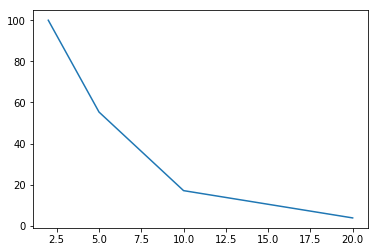

In [14]:
#In this part I automate the selection of the linear part of the curve when looked at in logarithmic scale
#The first step is to select all points from and including the last point that is 100%
#For this I create two new data frames per strain
WB_a  = MTZ_1["WB"]   
Conc_WB = MTZ_1["Conc"]
#I filter for all that are smaller than 99%
WB_aH = WB_a <99
#and ask for the length of that element
WB_aH = WB_a[WB_aH]
len(WB_aH)

#In the last step I give the total length minus the length of that element plus the data point exactly before to catch
#the last point of 100%
#I than use the same approach plus 3 to make sure I get the last point of 100% plus three more.
WB_x = Conc_WB[(7-(len(WB_aH)+1)):(7-len(WB_aH)+3)]
WB_y = WB_a[(7-(len(WB_aH)+1)):(7-len(WB_aH)+3)]

#fig, ax = plt.subplots()
#ax.set_yscale('log')
plt.plot(WB_x,WB_y)
plt.show

In [15]:
#Now I can use the created lists to fit them to an equation
fWB = np.polyfit(WB_x, np.log(WB_y), 1)
#Solve the equation
sWB = (np.log(50)-fWB[1])/fWB[0]
sWB = round(sWB, 5)
sWB #Fixed it by some pen and paper work with the equation.lel

5.3266

<function matplotlib.pyplot.show(*args, **kw)>

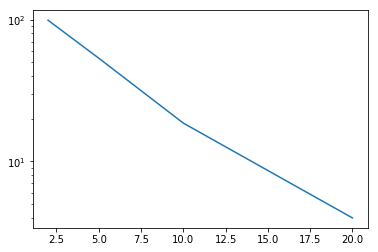

In [16]:
#Strain 2
C6NR_a  = MTZ_1["C6NR"]   
Conc_C6NR = MTZ_1["Conc"]
#I filter for all that are smaller than 99%
C6NR_aH = C6NR_a <97   #This is adjust since there is a 98% element.

C6NR_aH = C6NR_a[C6NR_aH]
len(C6NR_aH)

C6NR_x = Conc_C6NR[(7-(len(C6NR_aH)+1)):(7-len(C6NR_aH)+3)]
C6NR_y = C6NR_a[(7-(len(C6NR_aH)+1)):(7-len(C6NR_aH)+3)]

fig, ax = plt.subplots()
ax.set_yscale('log')
plt.plot(C6NR_x,C6NR_y)
plt.show

In [17]:
#Now I can use the created lists to fit them to an equation
fC6NR = np.polyfit(C6NR_x, np.log(C6NR_y), 1)
#Solve the equation
sC6NR = (np.log(50)-fC6NR[1])/fC6NR[0]
sC6NR = round(sC6NR, 5)
sC6NR

5.34817

<function matplotlib.pyplot.show(*args, **kw)>

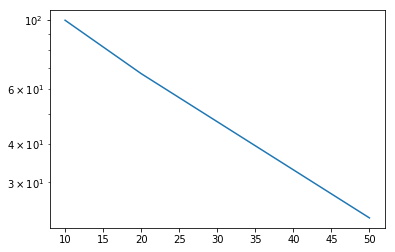

In [18]:
#Strain 3
C605_a  = MTZ_1["C605"]   
Conc_C605 = MTZ_1["Conc"]
#I filter for all that are smaller than 99%
C605_aH = C605_a <90   #This is adjust since there is a 91% element in the middle.

C605_aH = C605_a[C605_aH]
len(C605_aH)


C605_x = Conc_C605[(7-(len(C605_aH)+1)):(7-len(C605_aH)+3)]
C605_y = C605_a[(7-(len(C605_aH)+1)):(7-len(C605_aH)+3)]

fig, ax = plt.subplots()
ax.set_yscale('log')
plt.plot(C605_x,C605_y)
plt.show

In [19]:
#Now I can use the created lists to fit them to an equation
fC605 = np.polyfit(C605_x, np.log(C605_y), 1)
#Solve the equation
sC605 = (np.log(50)-fC605[1])/fC605[0]
sC605 = round(sC605, 5)
sC605 

28.63101

<function matplotlib.pyplot.show(*args, **kw)>

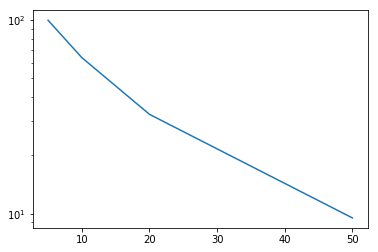

In [20]:
#Strain 4
C6aI_a  = MTZ_1["C6aI"]   
Conc_C6aI = MTZ_1["Conc"]
#I filter for all that are smaller than 99%
C6aI_aH = C6aI_a <99
#and ask for the length of that element
C6aI_aH = C6aI_a[C6aI_aH]
len(C6aI_aH)

#In the last step I give the total length minus the length of that element plus the data point exactly before to catch
#the last point of 100%
#I than use the same approach plus 3 to make sure I get the last point of 100% plus three more.
C6aI_x = Conc_C6aI[(7-(len(C6aI_aH)+1)):(7-len(C6aI_aH)+3)]
C6aI_y = C6aI_a[(7-(len(C6aI_aH)+1)):(7-len(C6aI_aH)+3)]

fig, ax = plt.subplots()
ax.set_yscale('log')
plt.plot(C6aI_x,C6aI_y)
plt.show

In [21]:
#Now I can use the created lists to fit them to an equation
fC6aI = np.polyfit(C6aI_x, np.log(C6aI_y), 1)
#Solve the equation
sC6aI = (np.log(50)-fC6aI[1])/fC6aI[0]
sC6aI = round(sC6aI, 5)
sC6aI

15.54086

In [22]:
#Now I can just collect the IC50s and write them out into a csv or picture. This will be my last step for this project
#for now. 
#I will however use the same approach on data from several days to establish get statsitics into this. Next step than: 
#Adjust graphs and caclulation for that.
df1 = pd.DataFrame([sWB, sC6NR, sC605, sC6aI])
df1 = df1.T
df1.columns = ['WB', 'C6NR', 'C605', 'C6aI']
df1.index = ['MTZ']
df1.index.names = ['Drug']
df1.columns.names = ['Strain']

#Define here the name of today just to make it more clear for the reader
IC50MTZ_12_9_19_1 = df1

#Write it to a csv
IC50MTZ_12_9_19_1.to_csv('IC50MTZ_12_9_19_1.csv')

#And to a html(more handy for bigger tables or images)
IC50MTZ_12_9_19_1.to_html('IC50MTZ_12_9_19_1.html')

In [23]:
#Here a way to bring it into markdown friendly format, this can than be used in a markdown cell.
print(IC50MTZ_12_9_19_1.to_markdown())

| Drug   |     WB |    C6NR |   C605 |    C6aI |
|:-------|-------:|--------:|-------:|--------:|
| MTZ    | 5.3266 | 5.34817 | 28.631 | 15.5409 |


Like in this markdown cell:

| Drug   |     WB |    C6NR |   C605 |    C6aI |
|:-------|-------:|--------:|-------:|--------:|
| MTZ    | 5.3266 | 5.34817 | 28.631 | 15.5409 |

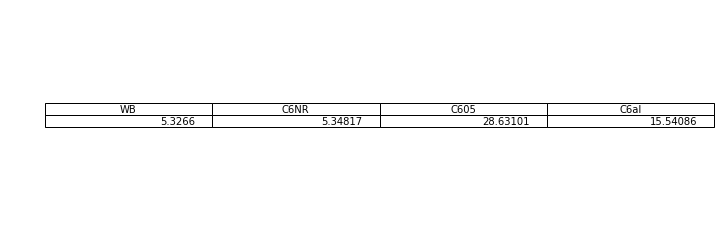

In [26]:
#This works to make it into a pdf, e.g. for publishing. Just have to fine-tune it a bit.
#Good starting point though.
from matplotlib.backends.backend_pdf import PdfPages


#https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText = df1.values, colLabels = df1.columns, loc = 'center')

#https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
pp = PdfPages("foo.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

In [25]:


#fig, ax = plt.subplots()
#ax.plot(x, y_est, '-')
#ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
#ax.plot(x, y, 'o', color='tab:brown')